In [5]:
import pandas as pd
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
#clf2 = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
#models2,predictions2 = clf2.fit(X_train, X_test, y_train, y_test)
#print(models2)

In [7]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
# Assuming 'Rented Bike Count' is the target variable
df = pd.read_csv('./data/seoul-bike-data-clean-for-model.csv', encoding='unicode_escape')
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

# Select only numerical features for simplicity
X = X.select_dtypes(include=['float64', 'int64'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,WeekDay
6056,8,27.20,69,1.80,1999,0.70,0.00,0.00,3,0,1,10,8,2018,5
5556,12,32.60,51,2.10,800,3.21,0.00,0.00,3,0,1,20,7,2018,5
5990,14,34.00,50,1.20,1744,1.68,0.00,0.00,3,0,1,7,8,2018,2
7674,18,16.90,47,1.40,1637,0.11,0.00,0.00,4,0,1,16,10,2018,2
3319,7,6.40,51,1.00,1398,0.19,0.00,0.00,2,0,1,18,4,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,3,4.60,65,0.10,2000,0.00,0.00,0.00,4,0,1,12,11,2018,1
100,4,-7.20,34,3.00,2000,0.00,0.00,0.00,1,0,1,5,12,2017,2
6605,5,20.60,65,1.10,2000,0.00,0.00,0.00,4,0,1,2,9,2018,7
1783,7,-7.20,70,1.90,1946,0.00,0.00,0.00,1,0,1,13,2,2018,2


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': range(1,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits
Best parameters: {'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [25]:
# Initialize the HistGradientBoostingRegressor
model = RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=500,
                      random_state=42)

In [26]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 34624.447815339554
Mean Absolute Error: 112.38690286079978
R^2 Score: 0.9168972507569618


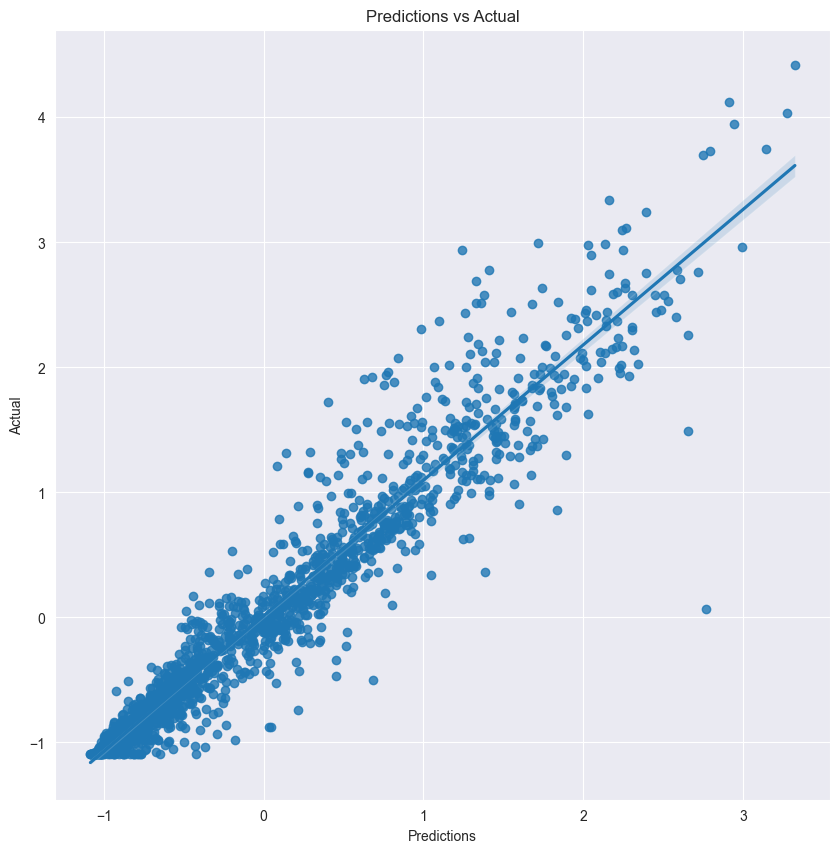

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the predictions vs actual
plt.figure(figsize=(10, 10))
sns.regplot(x=predictions, y=y_test, fit_reg=True)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Predictions vs Actual")
plt.show()

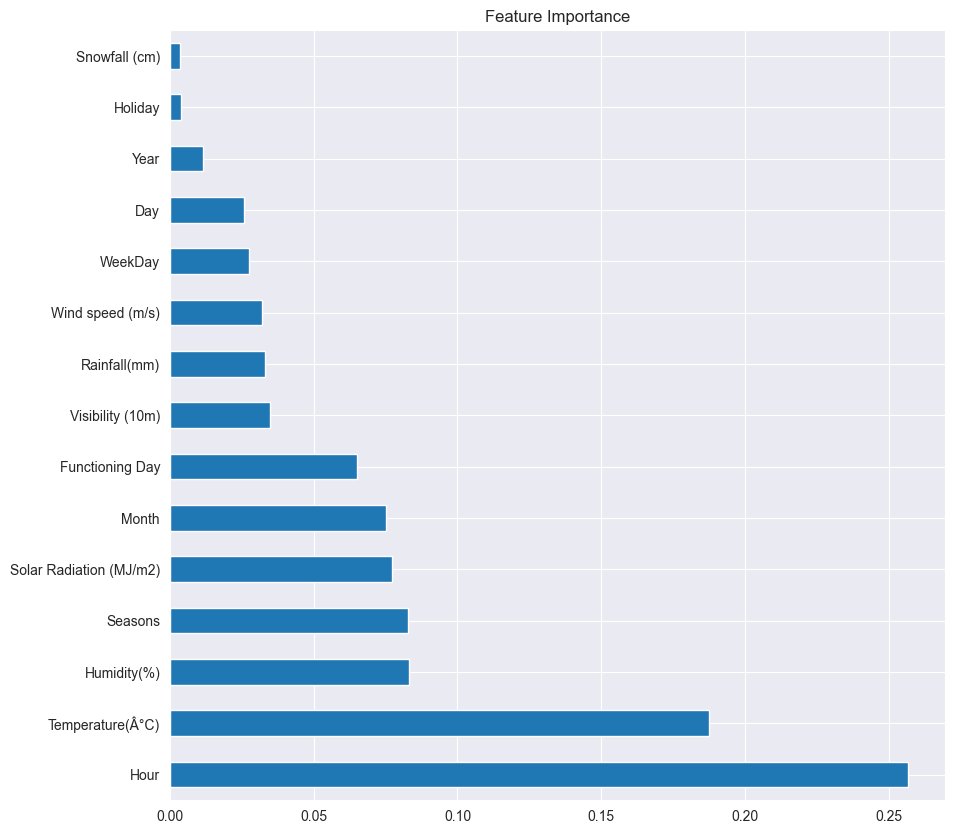

In [27]:
# Plot the feature importance
plt.figure(figsize=(10, 10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [28]:
#save model to disk
import pickle
pickle.dump(model, open('model.pkl', 'wb'))